# Day 6

### Topics

1. Bit of a review
1. Read in Image data with Stitch Image
1. Colors in images with Stitch Image
1. Goodness/badness histogram



First, import our usual things:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Bit of a review

Recall last time we played around with uploading data with Pandas and making some plots, with style!

In [2]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

Our data formatting:

In [3]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

We made a function to plot this dataset with different styles:

In [4]:
def make_gdp_plot(style): # note, "style" is something you can gooogle if you want more options
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.set_title("Style: " + style) # append 'Style:' and whatever style we chose
        ax.plot(gdp["DATE"], gdp["GDP"], '-')
        plt.show()

Now we can run our function.  Let's remind ourselves of our choses:

In [5]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

And then we made a few plots:

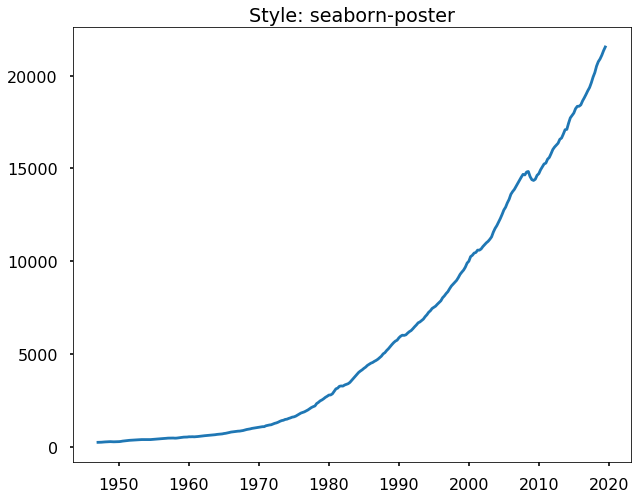

In [6]:
make_gdp_plot('seaborn-poster')  ## change

Today we are going to play with an image dataset (the Stitch Image) and use it to learn about color space.

More info about image datasets can be found on Week 01 & Week 02 of the grad-level course: https://uiuc-ischool-dataviz.github.io/spring2020/

## Read in Image data with Stitch Image

Make sure you have the pillow package installed with:

```python
!conda install -c anaconda pillow
```

Or through using the Anaconda GUI.

Let's use the pillow library and its `Image` interface to load an image:

In [7]:
import PIL.Image as Image # note here we are using the Image set of functions *within* the PIL library

Now we'll read in image file, here I'm assuming the stitch image is stored in the same directory as this notebook:

In [8]:
im = Image.open("stitch_reworked.png", "r")

Note, we can take a quick look at this image:

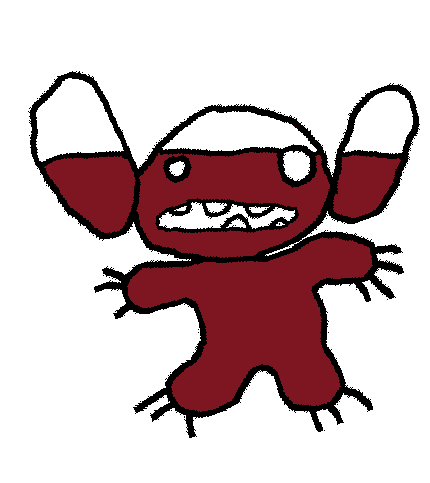

In [9]:
im

The `im` variable is sort of like a "fig" object in that there is a method to display it to the screen in a Jupyter Notebook.  Let's turn it into data:

In [10]:
data = np.array(im)

What is this data?

In [11]:
data

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

In [12]:
data.shape

(483, 430, 4)

This data is an image that is 483x430 in shape and has 4 color channels.  Why 4 and not 3?  The 4th channel is opacity -- how see through the image is.  More on this in a moment.

Note we can also display this image with the `matplotlib` interface:

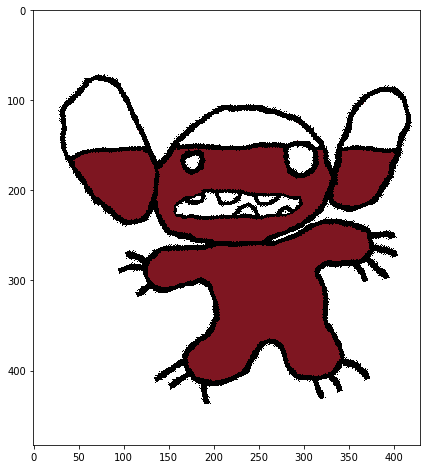

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.imshow(data)

plt.show()

We can see this way allows us to see some info about the # of pixels in the x/y directions.

Also, note that the y-direction starts at zero and *increases* going down.  This is common for data in an image format.

## Colors in images with Stitch Image

One question we might ask at this point is how many unique colors are there in this image?

We could try using `np.unique` to do this for us:

In [14]:
np.unique(data)

array([  0,  22,  33, 126, 255], dtype=uint8)

Hmmm, but we know we are supposed to have channels that are like RGB triplets.  By default, `np.unique` just looks for unique values across the entire data, so we have to be a little more careful.  Before we get into it, what we know there are 4 channels: these are RGBA:

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0b/RGBA_comp.png">

This is a nice representation of how the "A", or *alpha-channel* changes the look of the image.  Here is a rainbow colormap with a checkered pattern behind it.  As the alpha-channel decreases we are able to see more and more of the checkered background.

So what we *really* want to see is the number of unique RGBA combinations.  

Let's first recall what the dimension of the data is:

In [15]:
data.shape

(483, 430, 4)

We might be tempted to try an "axis" argument:

In [16]:
len(np.unique(data, axis=0))

362

But that doens't really do what we want, so we have to be a little trickier.

Let's first see how many unique values are in each channel:

In [17]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0 126 255]
channel= G unique values= [  0  22 255]
channel= B unique values= [  0  33 255]
channel= A unique values= [  0 255]


So this is still not giving us unique combinations of colors but it is telling us some very interesting stuff!  Its saying for example, that there are likely very few colors because there are just not that many levels of any chanel (at most 3 of each).  And its telling us that there are places on the image that are either perfectly solid (the alpha channel = 255) or perfectly see-through (alpha channel = 0).

What we really want to do is change our 483x430x4 dataset into a list of RGBA combinations.  We can do this with `numpy.reshape` by saying "hey, let's collapse our dataset along the 3rd dimension -- index of 2":

In [18]:
data.reshape(-1, data.shape[2])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [19]:
data.reshape(-1, data.shape[2]).shape

(207690, 4)

Now each pixel is represented by a row and we can, FINALLY, look for unique values along this first axis:

In [20]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

TahDah!  So, we see that ther are only 4 colors in this image and 1 is just a totally transparent color -- RGBA = [0,0,0,0].

How to figure out where these colors are?  Let's first start by trying to visualize where the transparent stuff is.  While drawing a checkered pattern on the back of our image might be cool, we can also "set" a gray color to our background more easily and then plot on top of this with `matplotlib`.

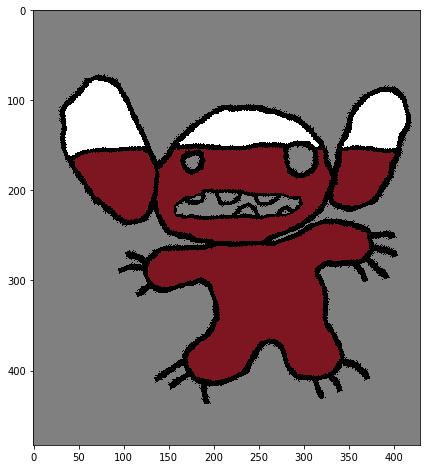

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

# plot on top!
ax.imshow(data)

plt.show()

What if I only wanted to plot the areas that are red regions?  Or change the red areas to blue?

We can do this by doing something called a "boolean mask" -- this is basically making an array of booleans (True or False) that will be true ONLY when the image is transparent.  Let's give this a shot:

In [22]:
image_boolean_mask = data[:,:,0] == 126 # from our understanding of RGB combinations this is the R channel that is redist

In [23]:
image_boolean_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

So, this is very much like doing a boolean mask for one value:

In [24]:
126 == 126

True

So, let's first turn these parts of the image blue by "resetting" their values to be 255 in the blue channel and 0 otherwise.

In [25]:
data[image_boolean_mask] = [0,0,255,255]

Finally, let's plot!

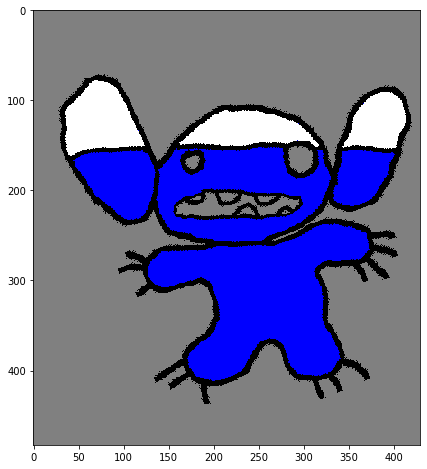

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

# plot on top!
ax.imshow(data)

plt.show()

A beautiful blue stitch!

You can also do more complex combinations of boolean searches for colors.  What we'll do now is use a "user-defined" library to do some of these manipulations for us. 

Make sure the `image_manipulations.py` file is in your current directory, and do:

In [27]:
from image_manipulations import my_boolean_mask

This is a little function I wrote myself that I stored in an external library.  I put in some doc strings too so we can see a bit of info about this function:

In [28]:
my_boolean_mask?

Let's try it! Let's replace black lines by purple.  We couldn't do this before -- why?  Let's look at our data again: 

In [29]:
np.unique(data.reshape(-1, data.shape[2]), axis=0)

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [  0,   0, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

If I tried to do a simple boolean mask with one of the channels for black -- [0,0,0,255] -- it would overlap with at least one more color so that won't work.  The function does a full set of boolean operations to take this into account (you can check out the function yourself if you are interested):

In [30]:
myMask = my_boolean_mask(data, [0,0,0,255])

This time, let's not overwrite our original image.  We can do this by copying the array:

In [31]:
newImageData = data.copy()

Now we can replace at will without changing the original data array!

In [32]:
newImageData[myMask] = [126, 0, 126, 255] # this will be a magenta looking thing!

Let's plot!

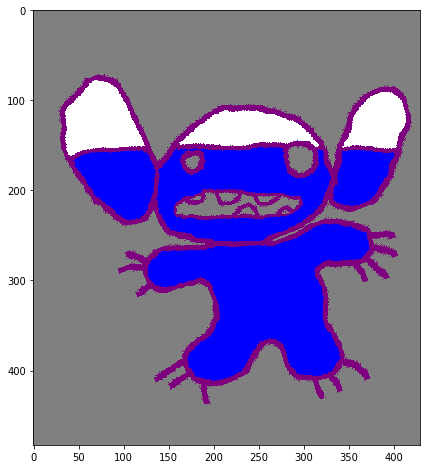

In [48]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

ax.set_facecolor('gray') # set background image

ax.imshow(newImageData)

plt.show()

Cool!  Now let's say we want to compare our modified image to the previous?  We can do this by making side by size figures with a slight modificaiton to our matplotlib call:

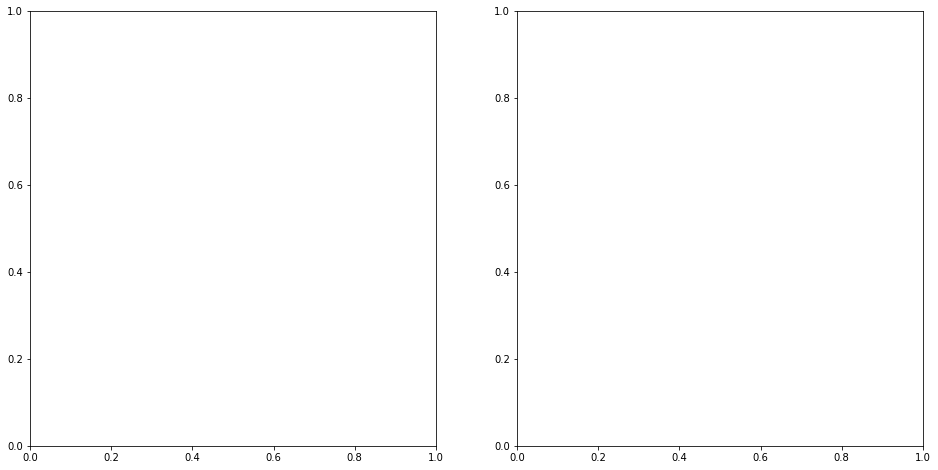

In [36]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

I haven't filled the figure with anything, just made some side-by-side plots.  We can try other configurations and even call it with the number of rows and columns explicitly:

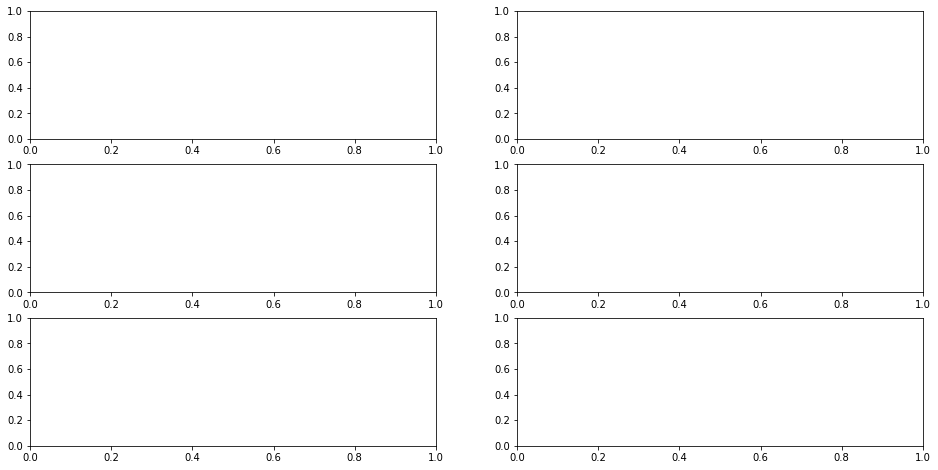

In [40]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(16,8))

Ok, let's go back to side by side plots:

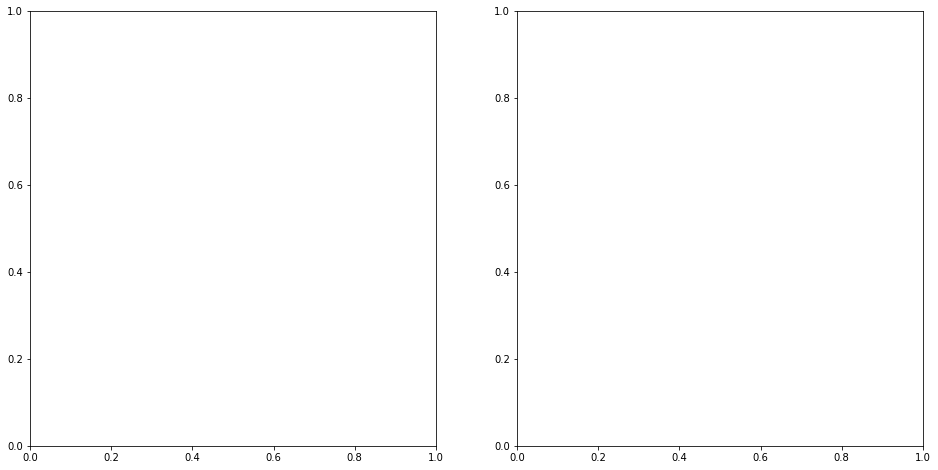

In [42]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

How do we access the different sets of axis?  Let's check what "ax" is now:

In [43]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9a96bbcd0>,
      dtype=object)

`ax` is actually a an *array* of axis!  We can access these axes the same way we would with any array:

In [44]:
ax[0]

In [45]:
ax[1]

Ok, let's actually put images on our plot:

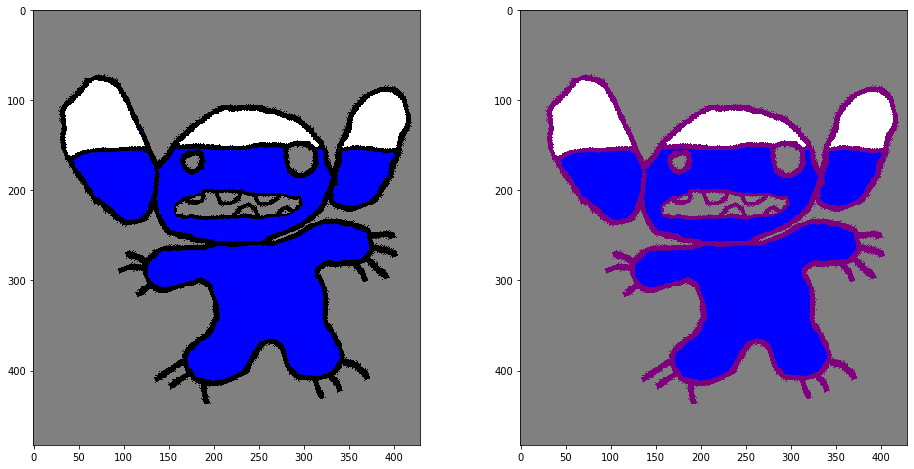

In [49]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

ax[0].set_facecolor('gray') # set background image
ax[0].imshow(data) # original

ax[1].set_facecolor('gray') # set background image
ax[1].imshow(newImageData)

plt.show()

We can even add labels/titles in the usual way:

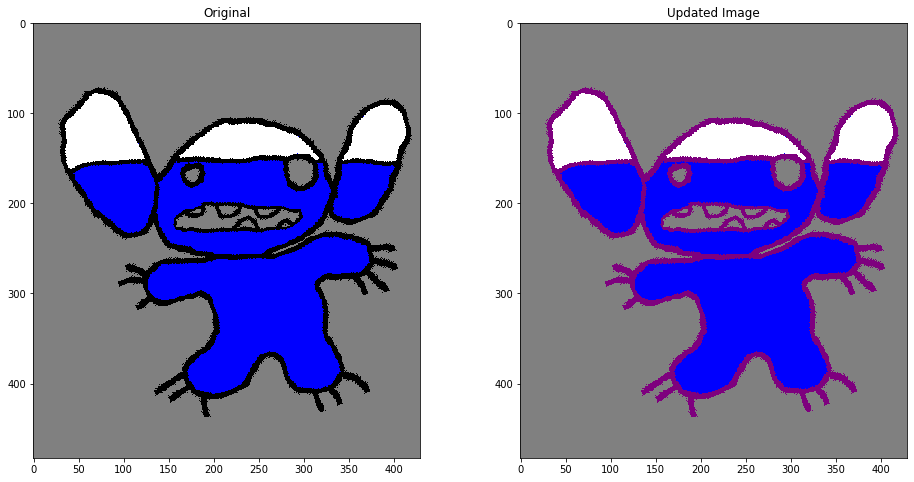

In [50]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,8))

ax[0].set_facecolor('gray') # set background image
ax[0].imshow(data) # original
ax[0].set_title('Original')

ax[1].set_facecolor('gray') # set background image
ax[1].imshow(newImageData)
ax[1].set_title('Updated Image')

plt.show()

What if I just wanted to plot *just* the blue part and set the *rest* of the image to fully transparent?

Let's copy our dataset again:

In [51]:
onlyBlueData = data.copy()

And call a boolean mask for blues:

In [52]:
onlyBlueMask = my_boolean_mask(onlyBlueData, [0, 0, 255, 255])

What I want now is to turn all of the pixels that are *not* blue into transparent.  So I do this with a "NOT-mask" which is basically a little twiddle in front of the mask instead of the mask itself:

In [53]:
onlyBlueData[~onlyBlueMask] = [0,0,0,0]

Let's plot and see what we did:

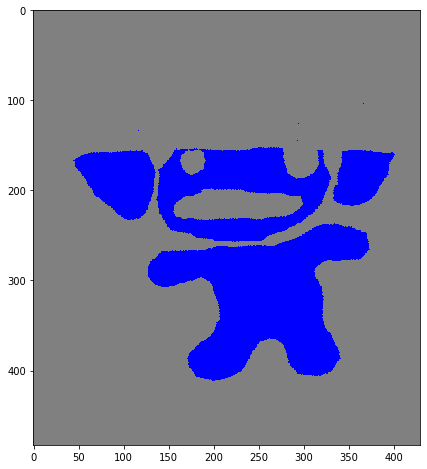

In [54]:
fig, ax = plt.subplots(1,1, figsize=(8,8)) # one fig again

ax.set_facecolor('gray') # set background image

ax.imshow(onlyBlueData)

plt.show()

## Goodness/badness histogram

Let's re-load our un-ultered image and take a quick look:

In [55]:
im = Image.open("stitch_reworked.png", "r")
data = np.array(im)

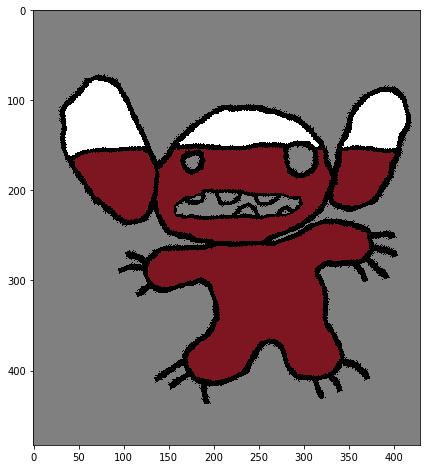

In [56]:
fig, ax = plt.subplots(1,1, figsize=(8,8)) # one fig again

ax.set_facecolor('gray') # set background image

ax.imshow(data)

plt.show()

So, when we first encountered this image we really wanted to measure the goodness and badness of Stitch, and now that we have masks we can do just this!  Let's grab the measurement of Stitch's goodness which is the white parts of his upper head and ears and the "bad" parts which are 